<a href="https://colab.research.google.com/github/raphdavid/RateMyProfessorData_vs_Salary/blob/main/RMPvsSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
salaryData = pd.read_csv("/content/drive/My Drive/ASU Employee Salary Data 2012-2017 - The State Press - 2018.csv")
#Justin's path

salaryData

,Calendar Year,Full Name,Job Description,Department Description,Salary,FTE,Unnamed: 6
0,2018,"Abadjivor,Enyah",Coordinator,Research Division 2 Tempe,"$36,565.14",1.0,NOTE: This data is public record salary data o...
1,2018,"Abbas,James",Assoc Professor,Sch Biological & Hlth Sys Engr,"$101,795.00",1.0,NaN
2,2018,"Abbaszadegan,Morteza",Professor,Sch Sustain Engr & Built Envrn,"$139,725.00",1.0,NaN
3,2018,"Abbe,Scott",Tech Support Analyst Coord,Engineering Technical Services,"$91,735.05",1.0,NaN
4,2018,"Abbl,Norma",Sr HR Consultant,HR Partners,"$85,103.70",1.0,NaN
...,...,...,...,...,...,...,...
11769,2018,"Zwingli,John",Instructor,WPC Management,49000,0.6,NaN
11770,2018,"Zygas,Kestutis",Assoc Professor,The Design School,72010.66,1.0,NaN
11771,2018,"Zygmond,Linda",Academic Success Specialist,Academic Advising Serv Poly,50312.66,1.0,NaN
11772,2018,"Zygutis,Linda",Instructor,Humanities Arts & Cultural,46000,1.0,NaN


In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Fetched 88.7 kB in 2s (50.1 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree  

In [ ]:

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.ratemyprofessors.com/search.jsp?queryBy=schoolId&schoolName=Arizona+State+University&schoolID=45&queryoption=TEACHER")











/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [ ]:
#Clicking the load professor button until it does not exist anymore so that we can load all the professors
import time


load_button = wd.find_element_by_xpath('//*[@id="mainContent"]/div[1]/div/div[5]/div/div[1]')

i = 0
while i < 400:
  load_button.location_once_scrolled_into_view
  wd.execute_script("arguments[0].click();", load_button)
  time.sleep(0.300)
  i+= 1

#Saving all the professors names and ratings in an array of tuples

#CSS selectors
all_names = wd.find_elements_by_class_name('name')
all_ratings = wd.find_elements_by_class_name('rating')

rmp = []

#iterate through all professors names and parse them into the right format, save them to an array
for i in range(len(all_names)):
  strArr = all_names[i].text.split("\n")
  prof_name = strArr[0].replace(" ", "")
  rating = float(all_ratings[i].text)

  rmp.append((prof_name,rating))
  print(str(i) + " " + str((prof_name,rating)))






Streaming output truncated to the last 5000 lines.
2208 ('Chowell-Puente,Gerardo', 2.0)
2209 ('Li,Jing', 4.0)
2210 ('Clay,Agnes', 3.5)
2211 ('Misra,Rajeev', 4.7)
2212 ('Marshall,Philip', 4.1)
2213 ('Foster,Stacy', 4.3)
2214 ('Calhoun,Cheshire', 3.6)
2215 ('Ayyanar,Raja', 3.3)
2216 ('Palazzolo,Edward', 4.2)
2217 ('Debiase,Jessica', 4.8)
2218 ('Bhattacharya,Anand', 4.1)
2219 ('Crozier,Peter', 3.4)
2220 ('Ramakrishna,B', 2.4)
2221 ('Carpenter,Serena', 3.5)
2222 ('Rowlands,Tim', 3.0)
2223 ('Gehrke,Rebecca', 4.5)
2224 ('Dounskaia,Natalia', 2.0)
2225 ('Butler,Nicholas', 2.9)
2226 ('Michalik,Brandon', 3.2)
2227 ('Ostrom,Lonnie', 4.5)
2228 ('Kuang,Yang', 3.0)
2229 ('Dai,Lenore', 4.5)
2230 ('Bilinsky,Stephanie', 3.2)
2231 ('Weaver,Edwin', 3.7)
2232 ('Donhauser,Lindsey', 4.4)
2233 ('Wiedmaier,Benjamin', 4.9)
2234 ('Blume,Meghan', 4.2)
2235 ('Fainekos,Georgios', 4.2)
2236 ('Peterson,Kathleen', 3.5)
2237 ('Kostadinovska,Daniela', 3.5)
2238 ('Levitt,Linda', 4.6)
2239 ('Chen,YI', 1.2)
2240 ('Messer,

ValueError: ignored

In [ ]:
rmp_data = pd.DataFrame(rmp,columns = ['Full Name','Rating'])
rmp_data

,Full Name,Rating
0,"Odish,Faris",4.3
1,"Fey,Richard",4.3
2,"Short,Robert",3.9
3,"McCarthy,Matthew",4.3
4,"Whitaker,Lisa",4.0
...,...,...
7202,"Cataldo,Vincenzo",1.0
7203,"Singh,Anoop",4.0
7204,"O'Bryan,alan",4.0
7205,"Manly,Michael",5.0


In [ ]:
merged = pd.merge(salaryData,rmp_data, on ='Full Name')

In [ ]:
merged

,Calendar Year,Full Name,Job Description,Department Description,Salary,FTE,Unnamed: 6,Rating
0,2018,"Abbas,James",Assoc Professor,Sch Biological & Hlth Sys Engr,"$101,795.00",1.0,NaN,3.5
1,2018,"Abbaszadegan,Morteza",Professor,Sch Sustain Engr & Built Envrn,"$139,725.00",1.0,NaN,3.0
2,2018,"Abbott,David",Assoc Professor,Shesc,"$84,688.00",1.0,NaN,4.2
3,2018,"Abbott,Joshua",Dir College of Law,College Of Law,"$92,000.00",1.0,NaN,4.1
4,2018,"Abbott,Joshua",Assoc Professor,School of Sustainability,"$137,006.53",1.0,NaN,4.1
...,...,...,...,...,...,...,...,...
2513,2018,"Zhuang,Houlong",Asst Professor,Sch Engr Matter Trnsprt Energy,93000,1.0,NaN,3.7
2514,2018,"Ziegler,Christian",Asst Professor,School of Arts Media & Engr,67509,1.0,NaN,1.5
2515,2018,"Zucker,Stanley",Professor,Div Ed Ldrshp & Innov/Tempe,100000,1.0,NaN,4.0
2516,2018,"Zuiker,Steven",Asst Professor,Div Ed Ldrshp & Innov/Tempe,77958.19,1.0,NaN,1.3


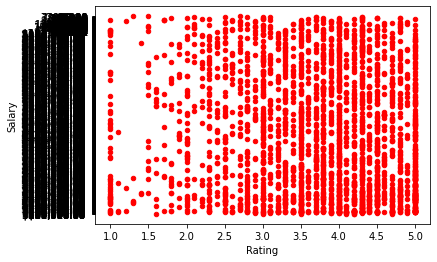

In [ ]:
merged.plot(kind='scatter',x='Rating',y='Salary',color='red')

In [ ]:
import plotly.express as px

In [ ]:

fig = px.scatter(merged, x="Rating", y="Salary", color = "Department Description", hover_data = ['Full Name'])



fig.show()